<a href="https://colab.research.google.com/github/bereketkibru/USGS_3DEP_LIDAR_custom_package/blob/main/example/visualizeRaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#!pip install rasterio
#!pip install geopandas
!pip install earthpy

     |████████████████████████████████| 1.4 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365097 sha256=c4711b8480a29fba3fc5da2414cb2e16c095112a959b8475d3e4f6ffa3d3e563
  Stored in directory: /root/.cache/pip/wheels/80/4d/12/9d924aa338ecb211c35e6fff47330e3f6d14b8c74971c527ca
Successfully built earthpy


In [26]:
import os
os.chdir("/content/drive/MyDrive")

['Getting started.pdf',
 'Untitled Site.gsite',
 'chapter 2.2.ppt',
 'Udemy - Bug Bounty Web Hacking',
 'Udemy - Web SecurityPenetration Testing for Beginners',
 'Complete_guide_to_rootkit_and_stealth_software_development',
 'Intro to Cyber Security Certification - Security+ Boot Camp',
 '2 - Network Security',
 'Kali linux Complete Training Program from Scratch course',
 'chapter 2.2.ppt.gslides',
 'Ch-6.pdf',
 'Ch-5.pdf',
 'class',
 'CH1_DAA_Lecture.ppt',
 'CH2_DAA_Lecture.ppt',
 'CH5_DAA_Lecture.ppt',
 'CH3_DAA_Lecture.ppt',
 'ch-4.pptx',
 'Ch-3b.ppt',
 'Ch-3a.pptx',
 'rech for engining for print 2013 (1).doc',
 '0-Signals and Systems,2ed - A.V.Oppenheim,A.S.Willsky,Prenti.pdf',
 'Oppenheim - Signals And Systems (Complete).pdf',
 'S SSol.pdf',
 '(McGraw)S S S.pdf',
 'cha 2.ppt',
 'cha 1.ppt',
 'CT-3512-SAD Syllabus.doc',
 'CT-3212_Software Engineering Syllabus.doc',
 '1. Systems analysis and design, 8th ed. Kenneth E. Kendall and Julie E. Kendall, 2010.pdf',
 '2. Essentials of Syste

In [49]:
# Prepare the landsat bands to be stacked using glob and sort

landsat_bands_data_path = "*.tif"
stack_band_paths = glob(landsat_bands_data_path)

In [50]:
stack_band_paths.sort()

In [51]:
stack_band_paths

['combination.tif', 'iowa.tif', 'iowa2.tif']

In [52]:
array, raster_prof = es.stack(stack_band_paths[0:], out_path='combination.tif')

In [53]:
extent = plotting_extent(array[0], raster_prof["transform"])

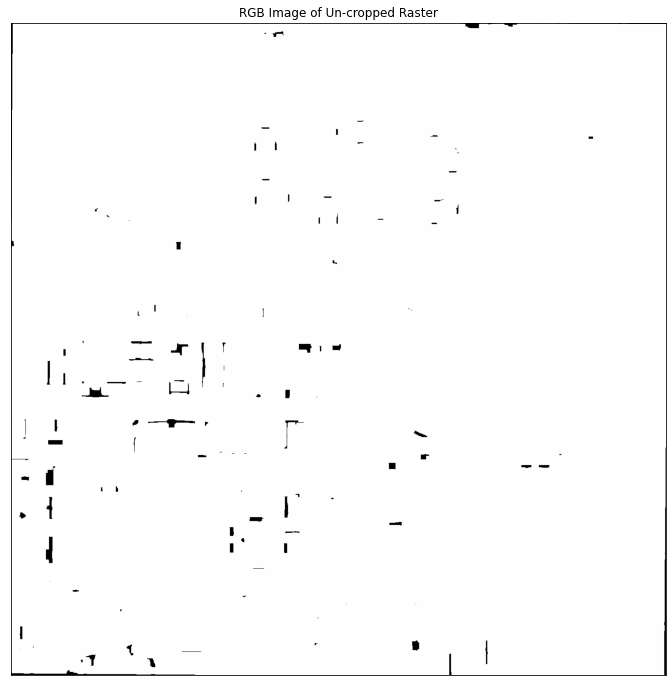

In [54]:
fig, ax = plt.subplots(figsize=(12, 12))
ep.plot_rgb(
    array,
    ax=ax,
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="RGB Image of Un-cropped Raster",
)
plt.show()


In [55]:
len(array)

4

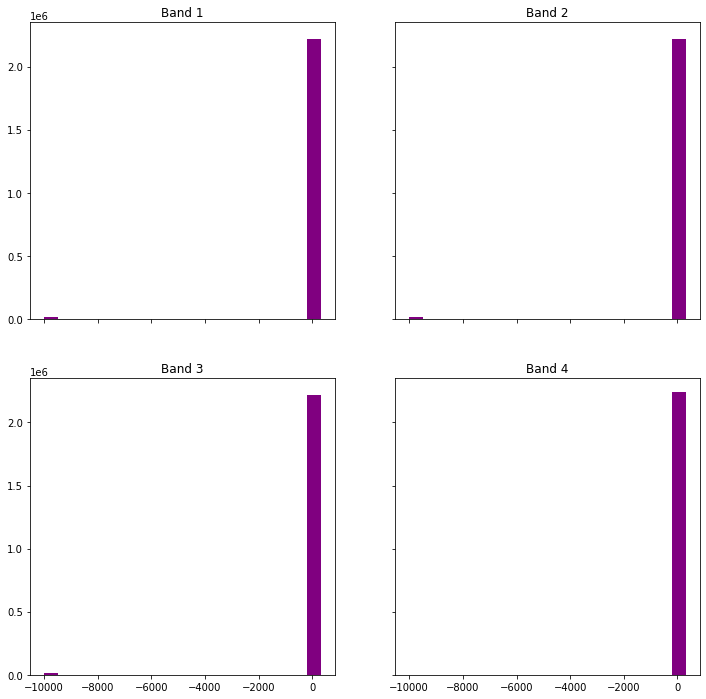

In [56]:
ep.hist(array, title=["Band 1", "Band 2", "Band 3", 'Band 4'])
plt.show()

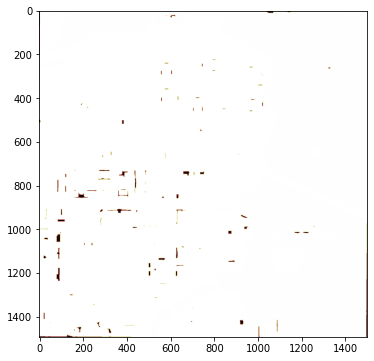

In [58]:
import rasterio
src = rasterio.open("iowa.tif")
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

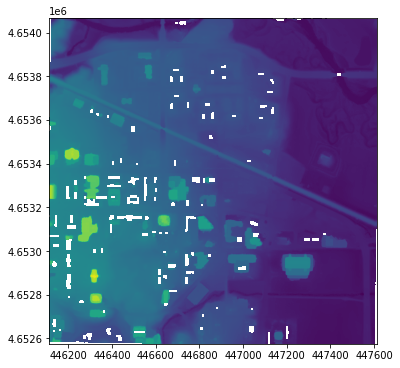

In [59]:
from rasterio.plot import show
plt.figure(figsize=(10, 6))
show(src)

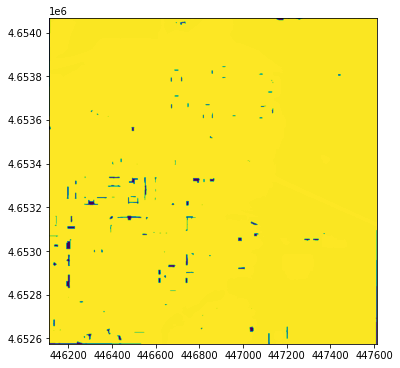

In [60]:
plt.figure(figsize=(10, 6))
show((src, 1), transform=src.transform, cmap='viridis')

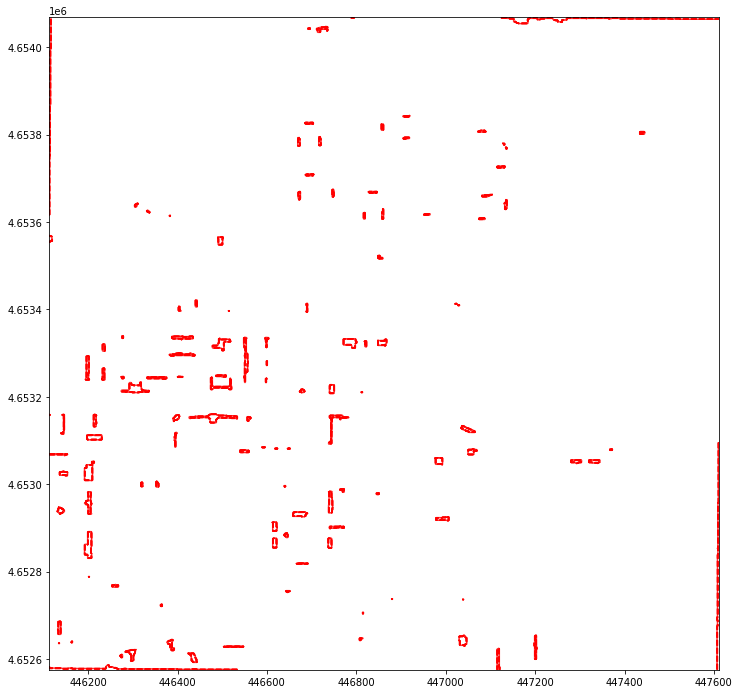

In [61]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((src, 1), ax=ax, contour=True, contour_label_kws={})

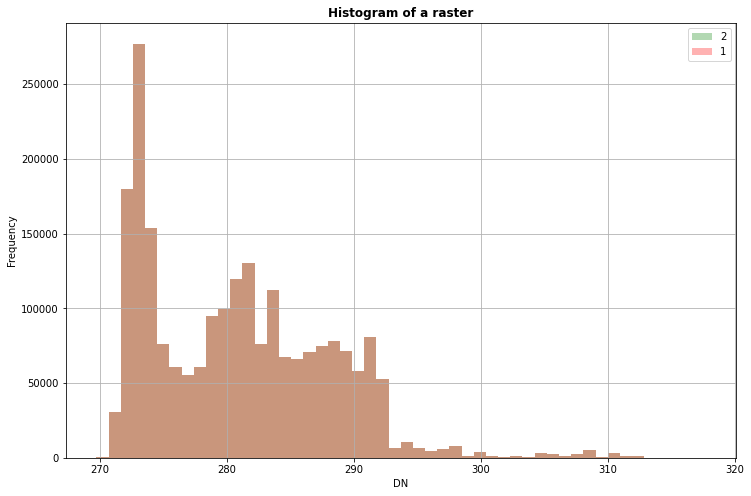

In [62]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")


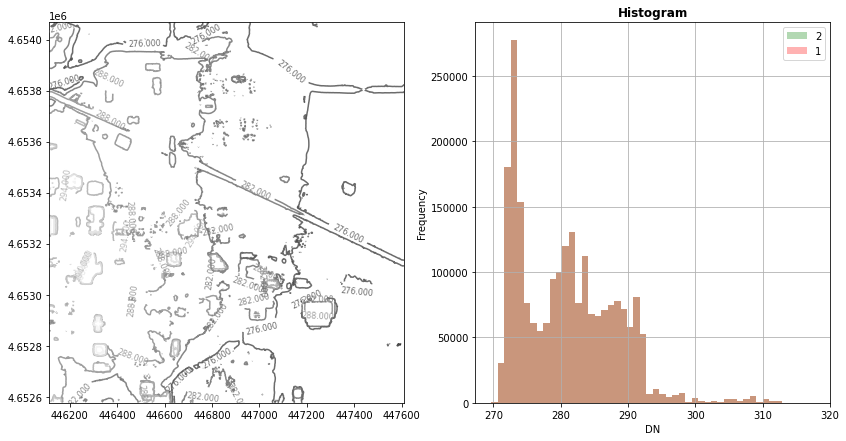

In [63]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show((src), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()


In [69]:
## Plot raster/tif image
# --------------------
import numpy as np
def plot_raster(rast_data, title='', figsize=(10,10)):
    """
    Plots population count in log scale(+1)
    """
    plt.figure(figsize = figsize)
    im1 = plt.imshow(np.log1p(rast_data),) # vmin=0, vmax=2.1)

    plt.title("{}".format(title), fontdict = {'fontsize': 20})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)

